In [61]:
#SVR

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("insurance.csv")
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


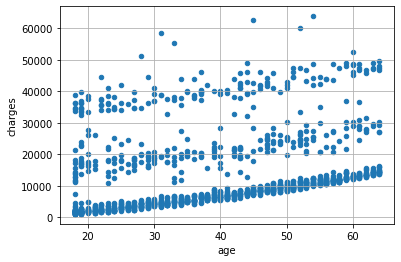

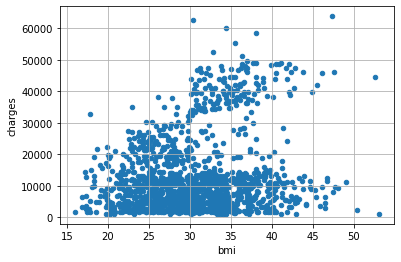

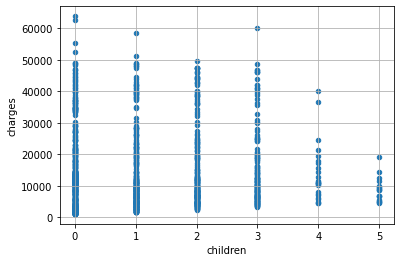

In [4]:
for i in df.describe().columns[:-1]:
    df.plot.scatter(i,'charges',grid=True)

In [64]:
df['sex'] = df['sex'].replace('male','0')
df['sex'] = df['sex'].replace('female','1')
df['smoker'] = df['smoker'].replace('yes','1')
df['smoker'] = df['smoker'].replace('no','0')
df['smoker'] = df['smoker'].astype('int')
df['sex'] = df['sex'].astype('int')

In [65]:
df.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
5,31,1,25.740,0,0,southeast,3756.62160
6,46,1,33.440,1,0,southeast,8240.58960
7,37,1,27.740,3,0,northwest,7281.50560
8,37,0,29.830,2,0,northeast,6406.41070
9,60,1,25.840,0,0,northwest,28923.13692


In [66]:
# Extract the training and test data
data = df.values
X = data[:, [0,1,2,3,4]]  # all rows, no label
y = data[:, 6]  # all rows, label only
print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train[:3]


[[19 1 27.9 0 1]
 [18 0 33.77 1 0]
 [28 0 33.0 3 0]
 ...
 [18 1 36.85 0 0]
 [21 1 25.8 0 0]
 [61 1 29.07 0 1]]
[16884.924 1725.5523 4449.462 ... 1629.8335 2007.945 29141.3603]


array([[24, 0, 23.655, 0, 0],
       [28, 1, 26.51, 2, 0],
       [51, 0, 39.7, 1, 0]], dtype=object)

In [67]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
sc_y = StandardScaler() 
X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(y.reshape(-1, 1))

In [68]:
from sklearn.svm import SVR

In [69]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train,y_train)

SVR()

In [70]:
#5 Predicting a new result
p_regression_RBF = regressor.predict(X_test)

In [86]:
print(p_regression_RBF[:10])

[9425.95124802 9368.45778985 9527.55293464 9433.01100567 9295.02651179
 9367.52677994 9295.12544775 9530.35352486 9326.724212   9454.83178355]


In [72]:
regressor = SVR(kernel='linear')
regressor.fit(X_train,y_train)

SVR(kernel='linear')

In [73]:
p_regression_LINEAR = regressor.predict(X_test)

In [84]:
print(p_regression_LINEAR[:10])

[ 9091.95711647  6254.82654874 13890.24453381  9527.2038334
  1882.76509682  5952.47238059  1698.21553238 13670.6718646
  4065.67117972 10339.21668487]


In [75]:
regressor = SVR(kernel='poly')
regressor.fit(X_train,y_train)

SVR(kernel='poly')

In [76]:
p_regression_POLY = regressor.predict(X_test)

In [85]:
print(p_regression_POLY[:10])

[ 8731.9523803   8238.36996352 10917.59358138  8833.94862876
  7532.27253162  8441.86146657  7447.05275069 11646.04688468
  7629.19327868  9215.06431189]


In [78]:
print("RMSE for Support Vector Regression:",np.sqrt(np.mean((y_test-p_regression_RBF)**2)))

RMSE for Support Vector Regression: 12859.012751545328


In [81]:
print("RMSE for Support Vector Regression:",np.sqrt(np.mean((y_test-p_regression_LINEAR)**2)))

RMSE for Support Vector Regression: 13017.656314092641


In [82]:
print("RMSE for Support Vector Regression:",np.sqrt(np.mean((y_test-p_regression_POLY)**2)))

RMSE for Support Vector Regression: 12787.468416529327
